# MACHINE LEARNING LAB-D1 SLOT(L33+L34)
# **TEAM MEMBERS:**
# SAI LAKSHMI.R-22MIA1042,
# K LAKSHMI VASANTHI-22MIA1099

Dataset Link: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset?select=Friday-WorkingHours-Morning.pcap_ISCX.csv

In [ ]:
import pandas as pd
data=pd.read_csv('/content/sample_data/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.500000,204.724205,...,32.0,3.594286e+02,1.199802e+01,380.0,343.0,16100000.0,4.988048e+05,16400000.0,15400000.0,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.500000,204.724205,...,32.0,3.202857e+02,1.574499e+01,330.0,285.0,16100000.0,4.987937e+05,16400000.0,15400000.0,BENIGN
2,0,113757377,545,0,0,0,0,0,0.000000,0.000000,...,0.0,9.361829e+06,7.324646e+06,18900000.0,19.0,12200000.0,6.935824e+06,20800000.0,5504997.0,BENIGN
3,5355,100126,22,0,616,0,28,28,28.000000,0.000000,...,32.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,0,54760,4,0,0,0,0,0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102453,53,350,2,2,60,266,30,30,30.000000,0.000000,...,20.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
102454,53,236,2,2,90,164,45,45,45.000000,0.000000,...,40.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
102455,53,240,2,2,90,164,45,45,45.000000,0.000000,...,32.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
102456,53,38089,2,2,58,276,29,29,29.000000,0.000000,...,32.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Replace infinite values with NaN
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Strategy 2: Impute NaN values with the mean of the column
numeric_data.fillna(numeric_data.mean(), inplace=True)

# ... (rest of your code remains the same) ...

labels = data[' Label']
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)
normalized_data = pd.concat([normalized_data, labels], axis=1)
normalized_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.051279,0.939506,0.000149,0.000056,0.005220,0.000002,0.016237,0.000000,0.036746,0.03553,...,0.571429,0.000003,2.836410e-07,0.000004,3.235849e-06,0.134167,0.006722,0.136667,0.128333,BENIGN
1,0.006104,0.939505,0.000149,0.000056,0.005220,0.000008,0.016237,0.000000,0.036746,0.03553,...,0.571429,0.000003,3.722220e-07,0.000003,2.688679e-06,0.134167,0.006722,0.136667,0.128333,BENIGN
2,0.000000,0.947979,0.002616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.088319,1.731595e-01,0.178302,1.792453e-07,0.101667,0.093475,0.173333,0.045875,BENIGN
3,0.084026,0.000834,0.000101,0.000000,0.000499,0.000000,0.001128,0.019022,0.005106,0.00000,...,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,BENIGN
4,0.000000,0.000456,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,BENIGN


In [ ]:
# Compute variance for each feature, excluding non-numeric columns
feature_variances = normalized_data.select_dtypes(include=np.number).var()
# Rank features by variance (descending order)
feature_ranking = feature_variances.sort_values(ascending=False).index
feature_ranking

Index([' ACK Flag Count', ' PSH Flag Count', ' URG Flag Count',
       ' Destination Port', ' Flow Duration', 'Fwd IAT Total', 'Bwd IAT Total',
       'Fwd PSH Flags', ' SYN Flag Count', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' Flow IAT Max', ' Fwd IAT Max',
       ' Idle Max', 'Idle Mean', ' Idle Min', ' Bwd IAT Max', 'FIN Flag Count',
       ' min_seg_size_forward', ' Bwd Packet Length Std', ' Fwd IAT Mean',
       ' Bwd IAT Mean', ' Fwd IAT Min', ' Bwd IAT Min', ' Flow IAT Std',
       ' Average Packet Size', ' Packet Length Mean',
       ' Bwd Packet Length Mean', ' Avg Bwd Segment Size', 'Fwd Packets/s',
       ' Down/Up Ratio', 'Bwd Packet Length Max', ' Packet Length Std',
       ' Bwd Packet Length Min', ' Fwd IAT Std', ' Bwd IAT Std',
       ' Flow Packets/s', ' Flow IAT Mean', ' Max Packet Length', ' Idle Std',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std', ' Flow IAT Min',
       ' Min Packet Length', ' Fwd Packet Length Max',
       ' Fwd P

In [ ]:
# Reorder columns based on feature ranking
ordered_data = normalized_data[feature_ranking]
ordered_data

,ACK Flag Count,PSH Flag Count,URG Flag Count,Destination Port,Flow Duration,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,SYN Flag Count,Init_Win_bytes_forward,...,Bwd Avg Bulk Rate,Bwd Avg Packets/Bulk,Bwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bytes/Bulk,Bwd PSH Flags,Fwd URG Flags,CWE Flag Count,Bwd URG Flags,Fwd Avg Bulk Rate
0,1.00000,0.000000,0.000000,0.051279,0.939506,9.416667e-01,9.416667e-01,1.0,1.000000,0.005768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00000,0.000000,0.000000,0.006104,0.939505,9.416667e-01,9.416667e-01,1.0,1.000000,0.014587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,0.000000,0.947979,9.500000e-01,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.084026,0.000834,8.343833e-04,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000456,4.563333e-04,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102453,0.00000,0.000000,0.000000,0.000832,0.000003,3.333333e-08,4.083333e-07,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102454,0.00000,0.000000,0.000000,0.000832,0.000002,4.083333e-07,4.083333e-07,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102455,0.00000,0.000000,0.000000,0.000832,0.000002,5.416667e-07,4.000000e-07,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102456,0.00000,0.000000,0.000000,0.000832,0.000318,4.000000e-07,8.333333e-09,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def knn_classification(X, y, k, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=k)  # Initialize kNN classifier
        knn.fit(X_train, y_train)  # Train the model
        y_pred = knn.predict(X_test)  # Make predictions

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    print(f"Metrics for k={k} (kNN with {cv} folds):")
    print(f"Accuracy: {np.mean(accuracy_scores):.4f} (std: {np.std(accuracy_scores):.4f})")
    print(f"Precision: {np.mean(precision_scores):.4f} (std: {np.std(precision_scores):.4f})")
    print(f"Recall: {np.mean(recall_scores):.4f} (std: {np.std(recall_scores):.4f})")
    print(f"F1-Score: {np.mean(f1_scores):.4f} (std: {np.std(f1_scores):.4f})")
    print("-" * 50)

# Assuming 'X' and 'y_encoded' are your feature and target data
# obtained from the previous steps in your notebook

# Run kNN for different k values
for k in [3, 5, 7]:
    knn_classification(X, y_encoded, k, cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=3 (Cross-Validation with 10 folds):
Accuracy: 0.9987 (std: 0.0003)
Precision: 0.9987 (std: 0.0003)
Recall: 0.9987 (std: 0.0003)
F1-Score: 0.9987 (std: 0.0003)
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=5 (Cross-Validation with 10 folds):
Accuracy: 0.9985 (std: 0.0003)
Precision: 0.9985 (std: 0.0003)
Recall: 0.9985 (std: 0.0003)
F1-Score: 0.9985 (std: 0.0003)
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=7 (Cross-Validation with 10 folds):
Accuracy: 0.9983 (std: 0.0002)
Precision: 0.9983 (std: 0.0002)
Recall: 0.9983 (std: 0.0002)
F1-Score: 0.9983 (std: 0.0002)
--------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def partial_distance_knn(X, y, k, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Using 'distance' for partial distance weighting
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    print(f"Metrics for k={k} (Partial Distance kNN with {cv} folds):")
    print(f"Accuracy: {np.mean(accuracy_scores):.4f} (std: {np.std(accuracy_scores):.4f})")
    print(f"Precision: {np.mean(precision_scores):.4f} (std: {np.std(precision_scores):.4f})")
    print(f"Recall: {np.mean(recall_scores):.4f} (std: {np.std(recall_scores):.4f})")
    print(f"F1-Score: {np.mean(f1_scores):.4f} (std: {np.std(f1_scores):.4f})")
    print("-" * 50)

# Assuming 'X' and 'y_encoded' are your feature and target data
# obtained from the previous steps in your notebook

# Run PD-kNN for different k values
for k in [3, 5, 7]:
    partial_distance_knn(X, y_encoded, k, cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=3 (Partial Distance kNN with 10 folds):
Accuracy: 0.9988 (std: 0.0003)
Precision: 0.9988 (std: 0.0003)
Recall: 0.9988 (std: 0.0003)
F1-Score: 0.9988 (std: 0.0003)
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=5 (Partial Distance kNN with 10 folds):
Accuracy: 0.9988 (std: 0.0003)
Precision: 0.9988 (std: 0.0003)
Recall: 0.9988 (std: 0.0003)
F1-Score: 0.9988 (std: 0.0003)
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=7 (Partial Distance kNN with 10 folds):
Accuracy: 0.9987 (std: 0.0003)
Precision: 0.9987 (std: 0.0003)
Recall: 0.9987 (std: 0.0003)
F1-Score: 0.9987 (std: 0.0003)
--------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fast_knn(X, y, k, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', n_jobs=-1)  # Using 'auto' and n_jobs=-1 for faster computation
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    print(f"Metrics for k={k} (Fast kNN with {cv} folds):")
    print(f"Accuracy: {np.mean(accuracy_scores):.4f} (std: {np.std(accuracy_scores):.4f})")
    print(f"Precision: {np.mean(precision_scores):.4f} (std: {np.std(precision_scores):.4f})")
    print(f"Recall: {np.mean(recall_scores):.4f} (std: {np.std(recall_scores):.4f})")
    print(f"F1-Score: {np.mean(f1_scores):.4f} (std: {np.std(f1_scores):.4f})")
    print("-" * 50)

# Assuming 'X' and 'y_encoded' are your feature and target data
# obtained from the previous steps in your notebook

# Run Fast kNN for different k values
for k in [3, 5, 7]:
    fast_knn(X, y_encoded, k, cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=3 (Fast kNN with 10 folds):
Accuracy: 0.9987 (std: 0.0003)
Precision: 0.9987 (std: 0.0003)
Recall: 0.9987 (std: 0.0003)
F1-Score: 0.9987 (std: 0.0003)
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=5 (Fast kNN with 10 folds):
Accuracy: 0.9985 (std: 0.0003)
Precision: 0.9985 (std: 0.0003)
Recall: 0.9985 (std: 0.0003)
F1-Score: 0.9985 (std: 0.0003)
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for k=7 (Fast kNN with 10 folds):
Accuracy: 0.9983 (std: 0.0002)
Precision: 0.9983 (std: 0.0002)
Recall: 0.9983 (std: 0.0002)
F1-Score: 0.9983 (std: 0.0002)
--------------------------------------------------


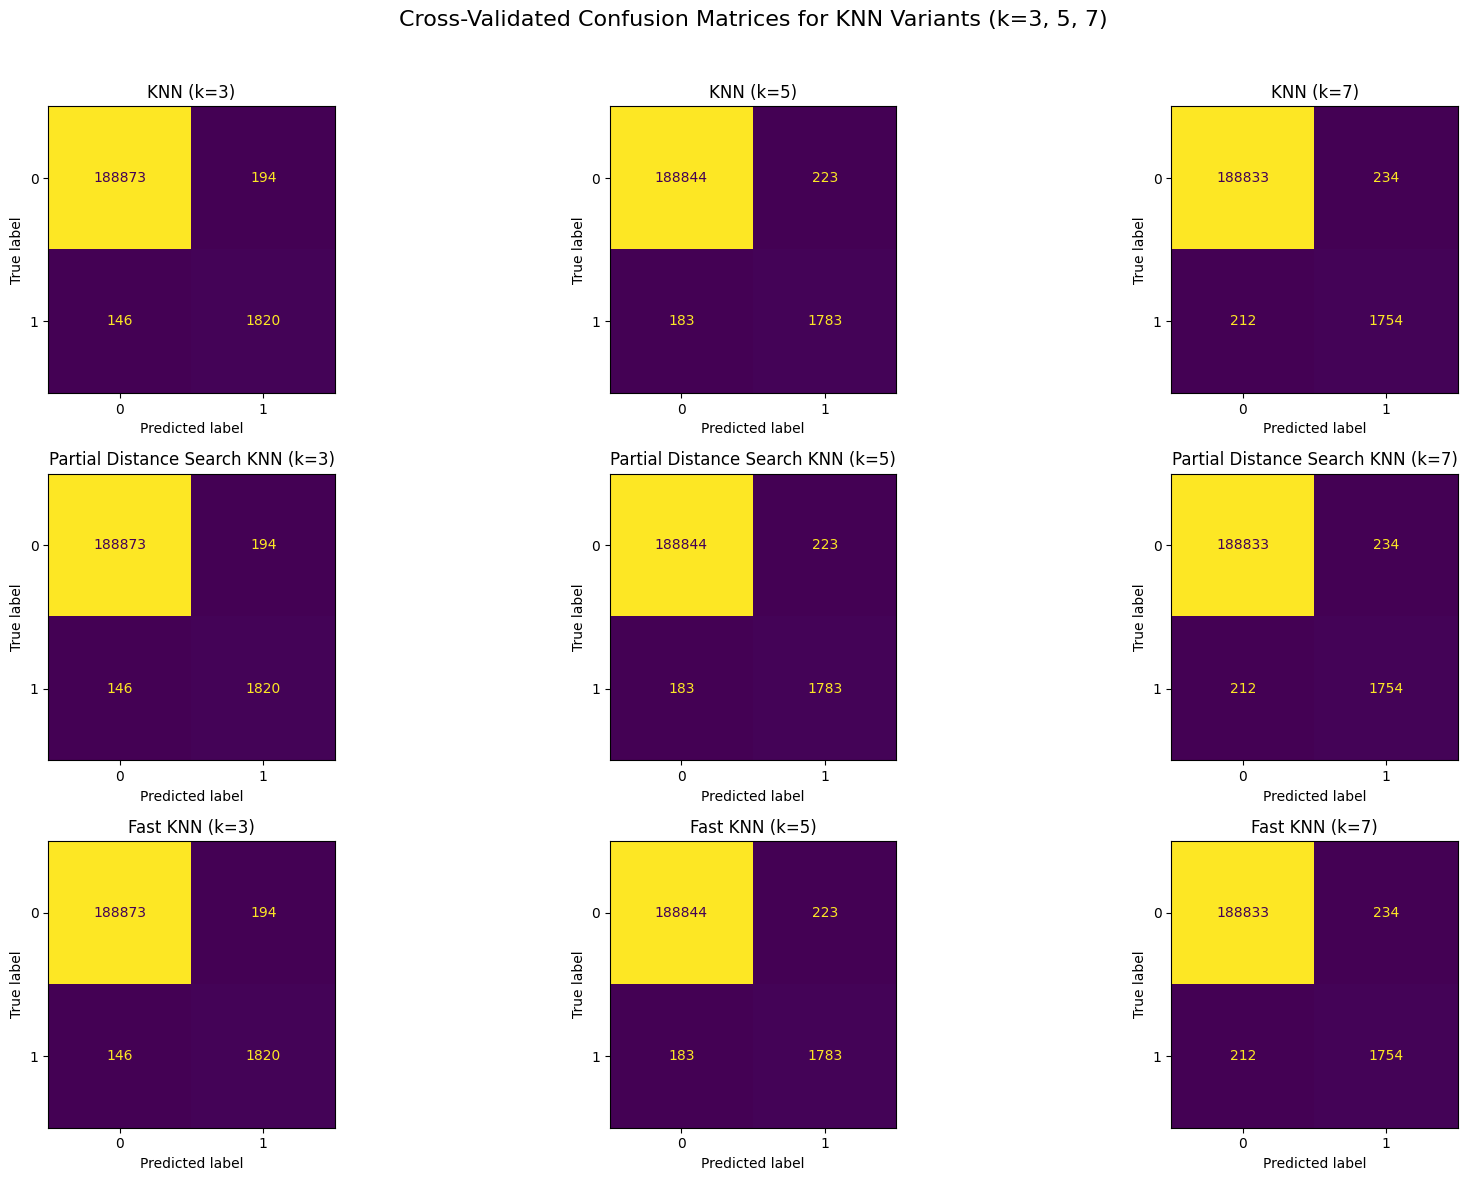

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

# Load the dataset
data = pd.read_csv('/content/sample_data/Friday-WorkingHours-Morning.pcap_ISCX.csv')  # Adjust to your file path

# Preprocessing
# Handle missing values, scale features, and encode labels
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_data.fillna(numeric_data.mean(), inplace=True)

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

# Assume 'Label' is the target column
labels = data[' Label']  # Adjust the column name if necessary
normalized_data['Label'] = labels

# Split data into features and target
X = normalized_data.drop(columns=['Label'])
y = normalized_data['Label']

# Set up cross-validation (Stratified K-Fold to preserve class distribution)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to visualize confusion matrices using cross-validation
def visualize_cross_val_confusion_matrices(models, k_values, X, y, cv):
    fig, axes = plt.subplots(len(models), len(k_values), figsize=(18, 12))
    fig.suptitle("Cross-Validated Confusion Matrices for KNN Variants (k=3, 5, 7)", fontsize=16)

    for i, (model_name, model_class) in enumerate(models.items()):
        for j, k in enumerate(k_values):
            # Create the model
            model = model_class(n_neighbors=k)

            # Perform cross-validation and predict
            y_pred = cross_val_predict(model, X, y, cv=cv)

            # Compute and plot confusion matrix
            cm = confusion_matrix(y, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(ax=axes[i, j], colorbar=False)
            axes[i, j].set_title(f"{model_name} (k={k})")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define the KNN variants (replace placeholders with actual implementations for advanced variants)
models = {
    "KNN": KNeighborsClassifier,
    "Partial Distance Search KNN": KNeighborsClassifier,  # Replace with actual method if available
    "Fast KNN": KNeighborsClassifier  # Replace with actual method if available
}

# Define values for k
k_values = [3, 5, 7]

# Visualize confusion matrices for cross-validation
visualize_cross_val_confusion_matrices(models, k_values, X, y, cv)


   k        kNN   Fast kNN  Partial Distance kNN
0  3  25.175931  24.135650             22.589539
1  5  22.617849  24.100848             22.673947
2  7  22.732911  23.953571             22.712192


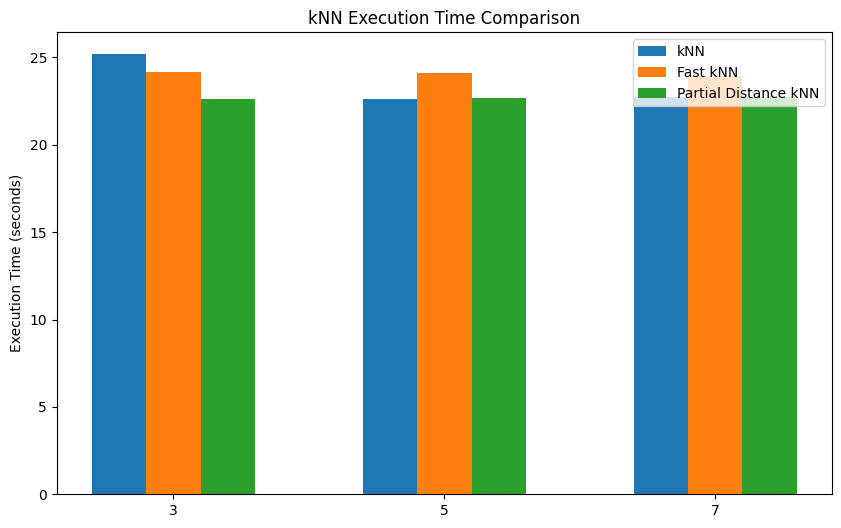

In [ ]:
k_values = [3, 5, 7]
knn_times = []
fast_knn_times = []
partial_distance_knn_times = []

# Assuming X and y are defined from your previous code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for k in k_values:
    knn_times.append(measure_time_knn(k, X_train, X_test, y_train, y_test))
    fast_knn_times.append(measure_time_fast_knn(k, X_train, X_test, y_train, y_test))
    partial_distance_knn_times.append(measure_time_partial_distance_knn(k, X_train, X_test, y_train, y_test))

# Create a table
data = {'k': k_values,
        'kNN': knn_times,
        'Fast kNN': fast_knn_times,
        'Partial Distance kNN': partial_distance_knn_times}
df = pd.DataFrame(data)
print(df)

# Create a bar graph
width = 0.2
x = np.arange(len(k_values))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, knn_times, width, label='kNN')
ax.bar(x, fast_knn_times, width, label='Fast kNN')
ax.bar(x + width, partial_distance_knn_times, width, label='Partial Distance kNN')

ax.set_ylabel('Execution Time (seconds)')
ax.set_title('kNN Execution Time Comparison')
ax.set_xticks(x)
ax.set_xticklabels(k_values)
ax.legend()

plt.show()